<a href="https://colab.research.google.com/github/chaimaeelh/Data_Scientist_NY/blob/main/Overall_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
data=pd.read_csv("/content/sales.csv",sep=",")
data.head(10)

,date,Blouse,Dress,Hoodie,Jacket,Shorts,Skirt,T-shirt
0,2018-09-27,19194,21046,12573,10720,3309,9791,26523
1,2018-10-04,13292,14721,6916,7645,2557,6981,17594
2,2018-10-11,19954,20708,7495,9138,3632,9956,23666
3,2018-10-18,17547,20016,7913,9693,3565,7894,20586
4,2018-10-25,17420,20397,8887,12132,3415,7495,19395
5,2018-11-01,11775,18957,5584,7582,2024,6762,12519
6,2018-11-08,11541,19511,5028,5944,1782,6422,11636
7,2018-11-15,11919,20791,6165,8118,1569,6439,12314
8,2018-11-22,19790,30262,12696,12141,3489,10147,23222
9,2018-11-29,9749,22161,4831,4994,1744,6629,10105


1- Check for null values in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     103 non-null    object
 1   Blouse   103 non-null    int64 
 2   Dress    103 non-null    int64 
 3   Hoodie   103 non-null    int64 
 4   Jacket   103 non-null    int64 
 5   Shorts   103 non-null    int64 
 6   Skirt    103 non-null    int64 
 7   T-shirt  103 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.6+ KB


# I-1 Overall trend and seasonality of sales

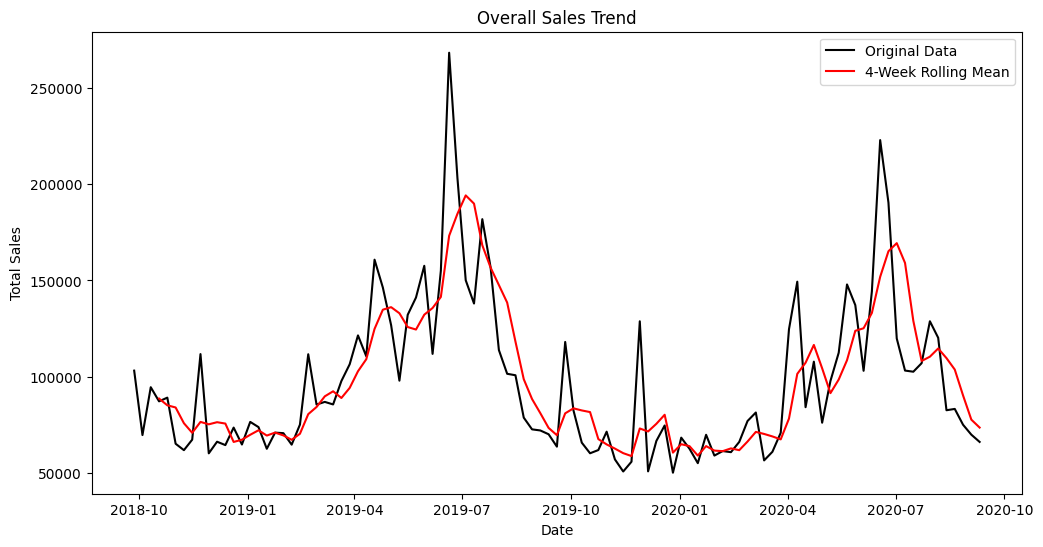

In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Calculate the total sales for each week
weekly_sales = data.sum(axis=1)

# Calculate the 4-week rolling mean
rolling_mean = weekly_sales.rolling(window=4).mean()

# Visualize the overall trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Original Data',color='black')
plt.plot(rolling_mean, label='4-Week Rolling Mean',color='red')
plt.title('Overall Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [ ]:
weekly_sales_df = pd.DataFrame({'all_items_sale': weekly_sales})

In [ ]:
weekly_sales=weekly_sales_df.reset_index()
weekly_sales

,date,all_items_sale
0,2018-09-27,103156
1,2018-10-04,69706
2,2018-10-11,94549
3,2018-10-18,87214
4,2018-10-25,89141
...,...,...
98,2020-08-13,82591
99,2020-08-20,83277
100,2020-08-27,75060
101,2020-09-03,69904


In [ ]:
data=data.reset_index()
# Define a function to map the month to the season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

# Add a new column 'Season' based on the 'date' column
data['Season'] = data['date'].dt.month.map(get_season)

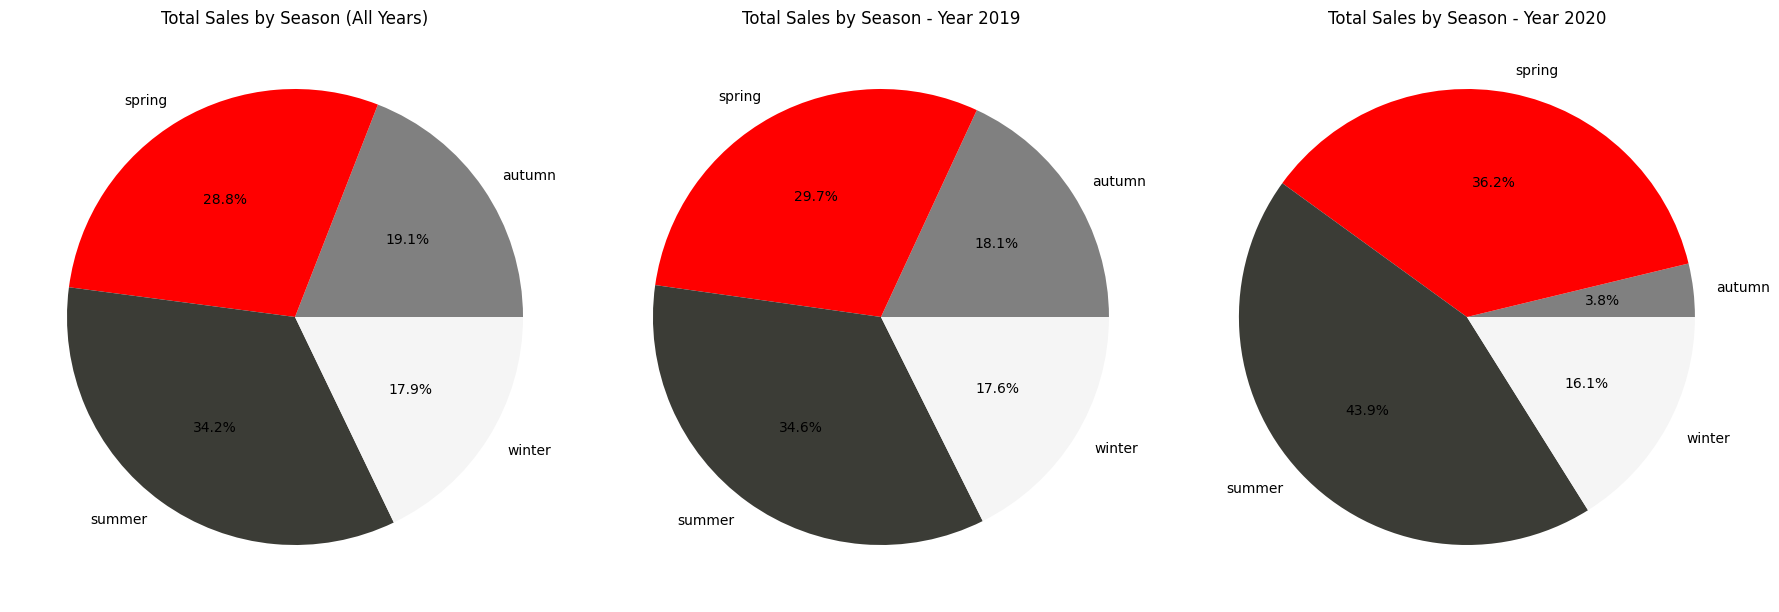

In [ ]:
data.set_index('date', inplace=True)

# Calculate the total sales by season
total_sales_by_season = data.groupby('Season').sum()

# Filter the data for the year 2019
year_2019_data = data['2019-01-01':'2019-12-31']

# Calculate the total sales by season for the year 2019
total_sales_by_season_2019 = year_2019_data.groupby('Season').sum()

# Filter the data for the year 2020
year_2020_data = data['2020-01-01':'2020-12-31']

# Calculate the total sales by season for the year 2020
total_sales_by_season_2020 = year_2020_data.groupby('Season').sum()

# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot the pie chart for total sales by season - All years
axes[0].pie(total_sales_by_season.sum(axis=1), labels=total_sales_by_season.index, autopct='%1.1f%%', colors=['gray', 'red', '#3B3C36', '#F5F5F5'])
axes[0].set_title('Total Sales by Season (All Years)')

# Plot the pie chart for total sales by season - Year 2019
axes[1].pie(total_sales_by_season_2019.sum(axis=1), labels=total_sales_by_season.index, autopct='%1.1f%%', colors=['gray', 'red', '#3B3C36', '#F5F5F5'])
axes[1].set_title('Total Sales by Season - Year 2019')

# Plot the pie chart for total sales by season - Year 2020
axes[2].pie(total_sales_by_season_2020.sum(axis=1), labels=total_sales_by_season.index, autopct='%1.1f%%', colors=['gray', 'red', '#3B3C36', '#F5F5F5'])
axes[2].set_title('Total Sales by Season - Year 2020')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


Converting date to a month period and then sum the number of item in each month

In [ ]:
# Convert 'date' to monthly period
weekly_sales['date'] = weekly_sales['date'].dt.to_period("M")

# Group by 'date' and sum
monthly_sales = weekly_sales.groupby('date').sum().reset_index()

# Convert 'date' to timestamp
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()




Converting the resulting date to timestamp datatype

In [ ]:
monthly_sales.head()

,date,all_items_sale
0,2018-09-01,103156
1,2018-10-01,340610
2,2018-11-01,366342
3,2018-12-01,269122
4,2019-01-01,354627


In [ ]:
monthly_sales['date'] = monthly_sales['date'].dt.to_period("M").dt.to_timestamp()


,date,all_items_sale
0,2018-09-01,103156
1,2018-10-01,340610
2,2018-11-01,366342
3,2018-12-01,269122
4,2019-01-01,354627


Visualization

Text(0.5, 1.0, 'Monthly customer sales')

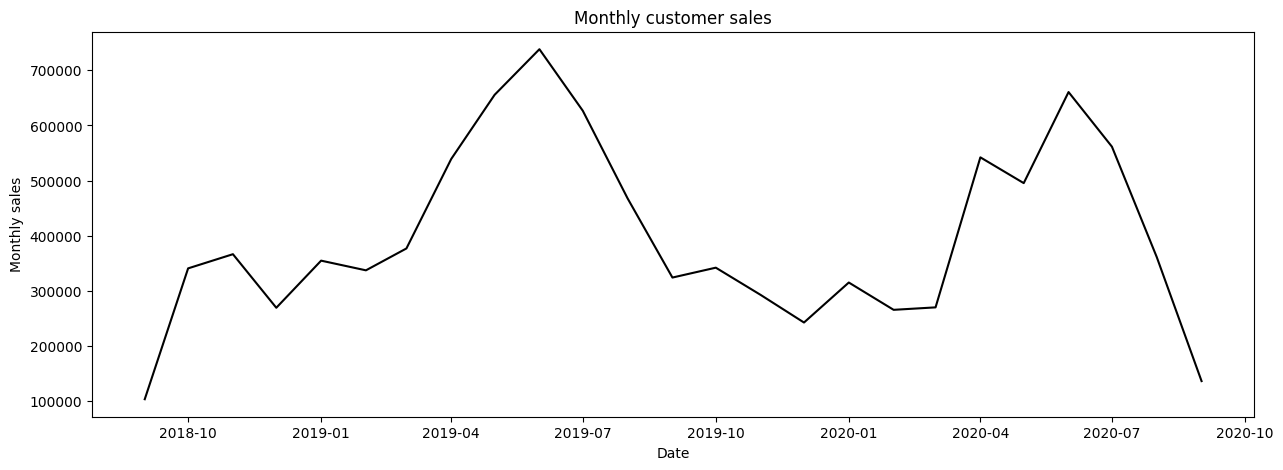

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['all_items_sale'],color='black')
plt.xlabel('Date')
plt.ylabel('Monthly sales')
plt.title('Monthly customer sales')

Call the difference on the sales columns to make the sales data stationery

In [ ]:
monthly_sales['sales_diff']=monthly_sales['all_items_sale'].diff()
monthly_sales=monthly_sales.dropna()
monthly_sales.head()

,date,all_items_sale,sales_diff
1,2018-10-01,340610,237454.0
2,2018-11-01,366342,25732.0
3,2018-12-01,269122,-97220.0
4,2019-01-01,354627,85505.0
5,2019-02-01,337060,-17567.0


Text(0.5, 1.0, 'Monthly customer sales difference')

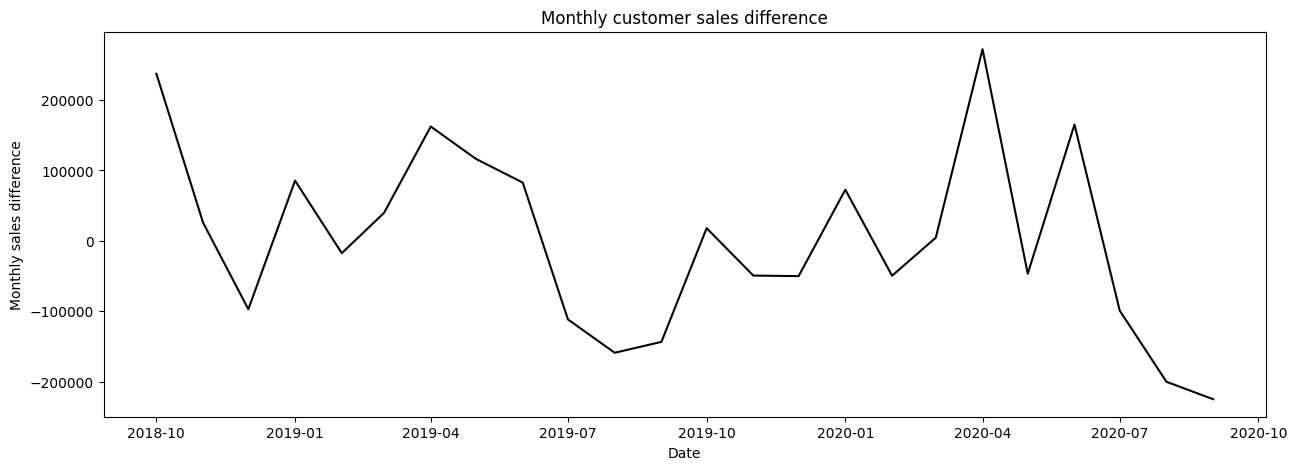

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'],monthly_sales['sales_diff'],color='black')
plt.xlabel('Date')
plt.ylabel('Monthly sales difference')
plt.title('Monthly customer sales difference')

# I-2 Product-specific Trends and Seasonality

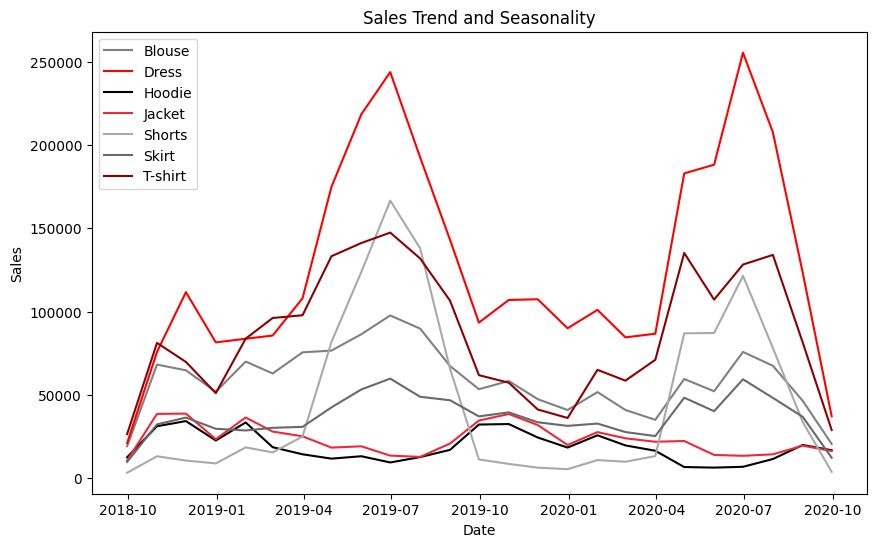

In [ ]:
product_types = ['Blouse', 'Dress', 'Hoodie', 'Jacket', 'Shorts', 'Skirt', 'T-shirt']
colors = ['gray', 'red','black', '#ED2939', 'darkgray', 'dimgray', 'darkred']
plt.figure(figsize=(10, 6))

# Plot the trend and seasonality for each product type
for product_type, color in zip(product_types, colors):
    # Calculate the sales trend for the current product type
    product_trend = data[product_type].resample('M').sum()

    # Plot the sales trend for the current product type
    plt.plot(product_trend.index, product_trend, label=product_type, color=color)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend and Seasonality')
plt.legend()
plt.show()

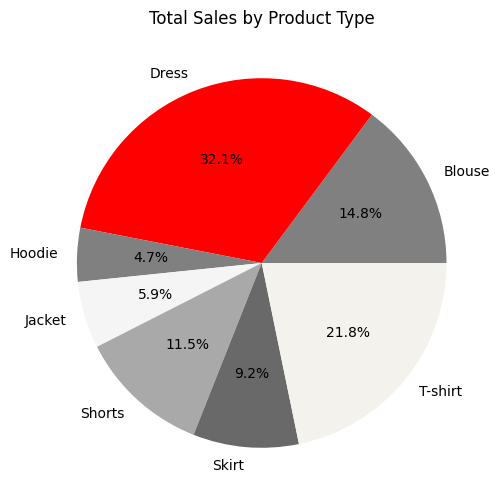

In [ ]:
# Create a single figure to plot all product types
plt.figure(figsize=(10, 6))
colors = ['gray', 'red','gray', '#F5F5F5', 'darkgray', 'dimgray', '#F3F2ED']
# Calculate the total sales for each product type
total_sales = data[product_types].sum()

# Create a pie chart of the total sales by product type
plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', colors=colors)

plt.title('Total Sales by Product Type')

plt.show()

In [ ]:

# Calculate the total sales for each product category
category_sales = data[product_types].sum()

# Find the best-selling & worst-selling item (category) based on  total sales
best_seller = category_sales.idxmax()
worst_seller = category_sales.idxmin()
print(f"The best-selling item is: {best_seller}")
print(f"The worst-selling item is: {worst_seller}")

The best-selling item is: Dress
The worst-selling item is: Hoodie


In [ ]:
# Calculate the total sales for each product category within each season
seasonly_sales = data.groupby(['Season']).sum()

print("Best sellers in each season:")
for season in seasonly_sales.index:
    best_seller = seasonly_sales.loc[season].idxmax()
    worst_seller = seasonly_sales.loc[season].idxmin()
    print(f"The best seller in {season.capitalize()} is: {best_seller}")
    print(f"The worst-selling item in {season.capitalize()} is: {worst_seller}")

Best sellers in each season:
The best seller in Autumn is: Dress
The worst-selling item in Autumn is: Shorts
The best seller in Spring is: Dress
The worst-selling item in Spring is: Hoodie
The best seller in Summer is: Dress
The worst-selling item in Summer is: Hoodie
The best seller in Winter is: Dress
The worst-selling item in Winter is: Shorts


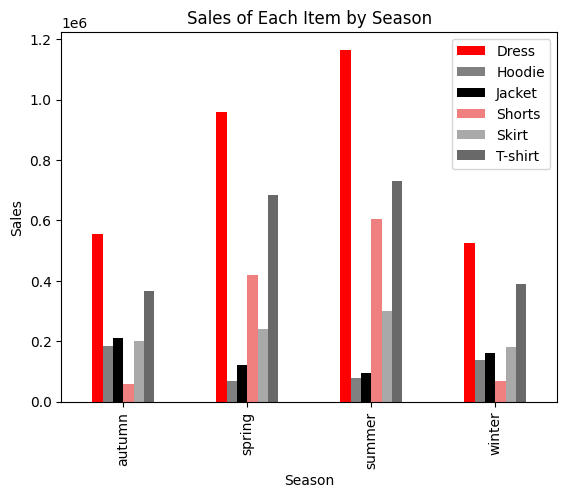

In [ ]:
# Get the list of items
items = list(data.columns[1:-1])  # Exclude 'date' and 'Season' columns

# Define colors for the items
colors = ['red', 'gray', 'black', 'lightcoral', 'darkgray', 'dimgray', 'darkred']

# Create the bar plot
seasonly_sales[items].plot(kind='bar', color=colors)
plt.xlabel('Season')
plt.ylabel('Sales')
plt.title('Sales of Each Item by Season')
plt.legend(loc='upper right')
plt.show()


# II- Correlations between sales of some product types

<ipython-input-17-1f75d6f5ea1a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


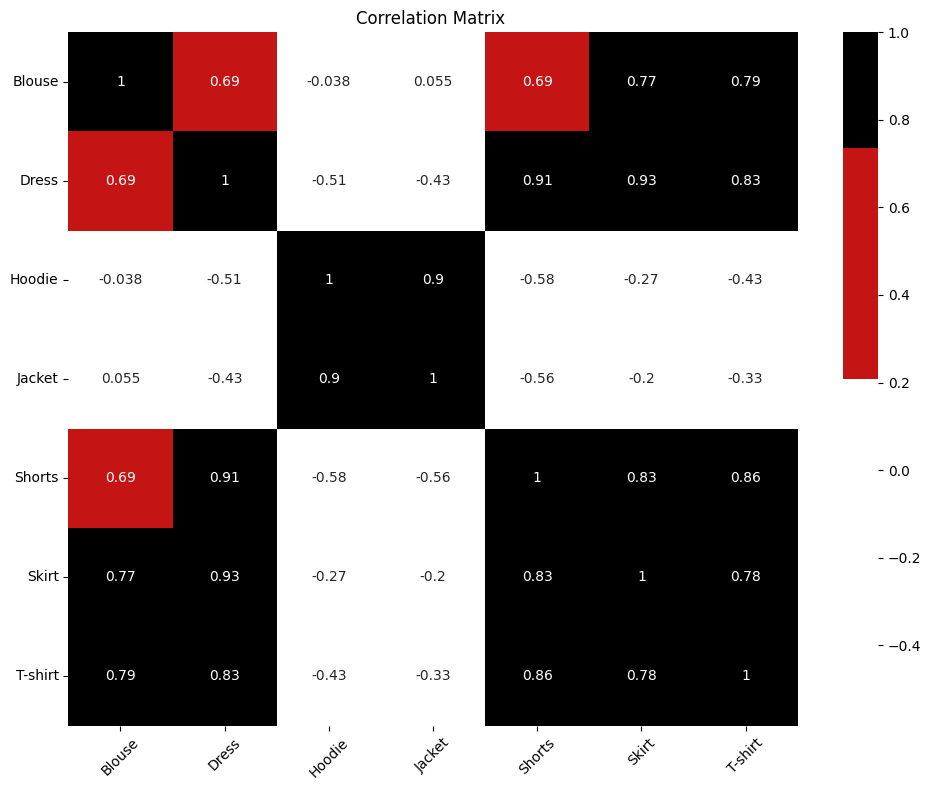

In [ ]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Define a custom color palette with shades of gray (white to black)
gray_palette = sns.color_palette(['#FFFFFF','#FFFFFF', '#FFFFFF', '#c41414',  '#c41414' ,'#000000'])

# Set up the figure and axes
plt.figure(figsize=(10, 8))
ax = plt.axes()

# Create a heatmap of the correlation matrix with the custom color palette
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=gray_palette, cbar=True, ax=ax)

# Customize the plot
heatmap.set_title('Correlation Matrix ')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


1- Blouse and Dress: Strong positive correlation (0.694), indicating significant association. When Blouse sales increase, Dress sales tend to increase, suggesting complementary demand or similar customer preferences.

2- Hoodie and Dress: Negative correlation (-0.509), implying potential substitution or opposite customer preferences. Increased Hoodie sales may lead to decreased Dress sales.

3- Hoodie and Jacket: Strong positive correlation (0.899), suggesting a complementary relationship. Increased Hoodie sales coincide with increased Jacket sales, indicating similar customer preferences.

4- Skirt and Dress: Strong positive correlation (0.931), highlighting a close relationship. Increased Skirt sales correspond to increased Dress sales, indicating potential complementary demand.

5- Shorts and Dress: Positive correlation (0.915), indicating a strong positive relationship. Increased Shorts sales coincide with increased Dress sales, suggesting complementary demand.

6-T-shirt and Dress: Positive correlation (0.831), signifying a positive relationship. Increased T-shirt sales coincide with increased Dress sales, indicating potential complementary demand or similar customer preferences.